# About this notebook

Here, we will demonstrate how to use the code in TremaineWeinberg.py, using the strongly barred example shown in Géron et al. (2022). We fill aim to reproduce Figures 2, 3, 4 and 5 from the paper.

# Imports

In [28]:
import pandas as pd
from TremaineWeinberg import Tremaine_Weinberg
import numpy as np
import matplotlib.pyplot as plt
import time
from marvin.tools.maps import Maps

# Defitions

In [29]:
def adjust_PAs(lst, source = 'NSA'):
    '''
    TODO: Change so that code needs angles East of North.
    
    PAs should be in deg!
    The NSA PAs are east of north. Ours are clockwise from 0 deg. NSA 0deg is actually 90deg for us
    Also make sure PAs are between 0 and 180
    '''
    
    if source == 'NSA':
        lst = 180 - np.array(lst) + 90
        
    for i in range(len(lst)):
        if lst[i] > 180:
            lst[i] = lst[i] - 180
        elif lst[i] < 0:
            lst[i] = lst[i] + 180
    
    return lst

# Code

In [30]:
plateifu = '11956-12702'

maps = Maps(plateifu = plateifu, bintype='VOR10')

df_inputs = pd.read_csv('tables_geron2022/Table1.csv')
i = np.where(df_inputs['PLATEIFU'] == plateifu)[0][0]

inc = df_inputs['inc'][i]
inc_err = df_inputs['inc_err'][i]
PA = df_inputs['PA'][i]
PA_err = df_inputs['PA_err'][i]
L_bar = df_inputs['R_bar'][i] * 2 
L_bar_err = df_inputs['R_bar_err'][i] * 2
PA_bar = df_inputs['PA_bar'][i]
PA_bar_err = df_inputs['PA_bar_err'][i]

print(f'Galaxy plateifu: {plateifu}')
print(f'Inclination: {np.round(inc,2)}+-{np.round(inc_err,2)} deg')
print(f'Position angle: {np.round(PA,2)}+-{np.round(PA_err,2)} deg')
print(f'Bar length: {np.round(L_bar,2)}+-{np.round(L_bar_err,2)} arcsec')
print(f'Position angle of the bar: {np.round(PA_bar,2)}+-{np.round(PA_bar_err,2)} deg')

Galaxy plateifu: 11956-12702
Inclination: 60.81+-1.05 deg
Position angle: 34.8+-0.53 deg
Bar length: 26.93+-0.97 arcsec
Position angle of the bar: 14.44+-0.09 deg


In [37]:
start_time = time.time()

np.warnings.filterwarnings('ignore')

tw = Tremaine_Weinberg(PA, inc, L_bar, PA_bar, maps, 
                       snr_min = 0, PA_err = PA_err, inc_err = inc_err,
                       barlen_err = L_bar_err, PA_bar_err = PA_bar_err,
                      n_MC = 0, h_method = 'individual', print_times=False)

print(f'{np.round(time.time() - start_time,2)} seconds elapsed.')

4.39 seconds elapsed.


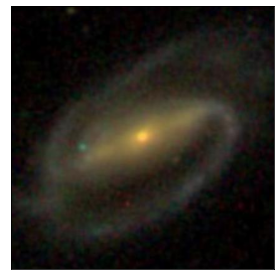

In [38]:
# You can look at the galaxy by doing (image is from SDSS, obtained through Marvin)
tw.plot_img()

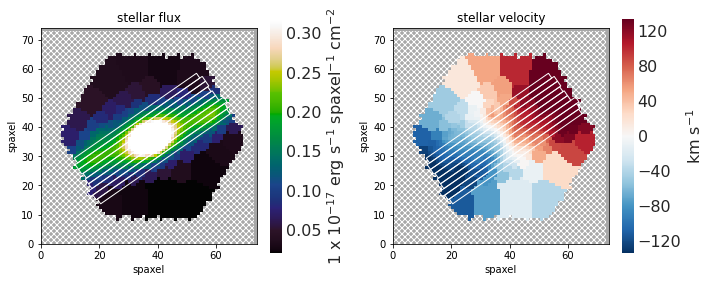

In [42]:
# You can plot various maps, similar to Figure 2 in Géron et al. (2022) by doing:
tw.plot_maps(plot_apers = True)

# The plot_apers parameter plots the apertures used on top of the maps.  

# By default it plots the stellar flux and stellar velocity. But you can also plot X_Sigma and V_Sigma.
# This can be done by doing:
# tw.plot_maps(maps = ['stellar_flux','stellar_vel','X_Sigma','V_Sigma'])


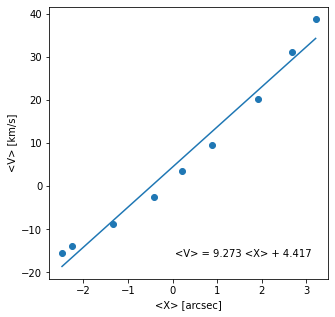

The NRMSE on this fit is: 0.0516


In [46]:
# You can also check whether the different slits agree with each other, by inspecting the <X> vs <V> plot.
# This is similar to Figure 3 in Géron et al. (2022)

tw.plot_X_V()

# You can access the NRMSE on this fit by doing:
print(f'The NRMSE on this fit is: {np.round(tw.NRMSE_X_V,4)}')

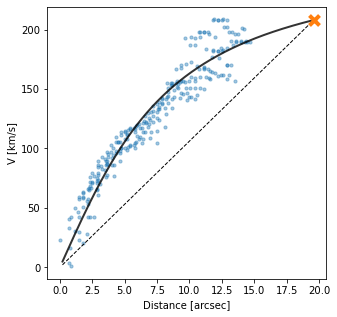

In [47]:
# One can also visualise how to corotation radius (Rcr) is obtained by plotting the velocity curve,
# which is similar to Figure 4 in Géron et al. (2022):

tw.plot_V_curve()

In [53]:
# Finally, one can see the final histograms of the bar pattern speed, corotation radius and curly R,
# as shown in Figure 5 of Géron et al. (2022), by doing:

tw.plot_hist_MC(variable = ['Omega'])

AssertionError: variable can either be Omega, Omega_phys, R_corot, R_corot_phys or R.

In [ ]:
# In the end, make comparison to new version and my output in the csv files from the paper. Maybe in separate .gitignore notebook of whateever